In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [6]:
df = pd.read_excel("athletewise data.xlsx")

df_numeric = df.drop(columns=['Athlete'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

High-dimensional data can pose challenges for clustering algorithms due to the "curse of dimensionality," where the notion of distance becomes less meaningful as dimensions increase. PCA reduces the number of dimensions by projecting the data onto a lower-dimensional space while retaining most of the variance. This simplification can enhance the performance of DBSCAN.

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [17]:
eps_values = np.arange(0.1, 2.0, 0.05)
results_pca = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=17)
    labels = dbscan.fit_predict(X_pca)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    if n_clusters > 1:
        silhouette_avg = silhouette_score(X_scaled, labels)
        calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)
        davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)
    else:
        silhouette_avg = calinski_harabasz_avg = davies_bouldin_avg = None
    
    results_pca.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'silhouette_score': silhouette_avg,
        'calinski_harabasz_score': calinski_harabasz_avg,
        'davies_bouldin_score': davies_bouldin_avg
    })

results_pca_df = pd.DataFrame(results_pca)
optimal_eps_pca = results_pca_df.loc[results_pca_df['silhouette_score'].idxmax()]['eps']

results_pca_df, optimal_eps_pca

(     eps  n_clusters  n_noise  silhouette_score  calinski_harabasz_score  \
 0   0.10           2     2717         -0.084423               156.124357   
 1   0.15           5     2252         -0.155334               148.664555   
 2   0.20           8     1696         -0.063133               136.363492   
 3   0.25           4     1209          0.079139               288.676990   
 4   0.30           6      813          0.045458               186.940440   
 5   0.35           1      604               NaN                      NaN   
 6   0.40           4      438          0.161831               191.341756   
 7   0.45           1      329               NaN                      NaN   
 8   0.50           2      254          0.303046               277.672269   
 9   0.55           2      211          0.327550               258.160601   
 10  0.60           1      176               NaN                      NaN   
 11  0.65           1      162               NaN                      NaN   

In [21]:
dbscan = DBSCAN(eps=0.3, min_samples=17)

clusters = dbscan.fit_predict(X_pca)

n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 813


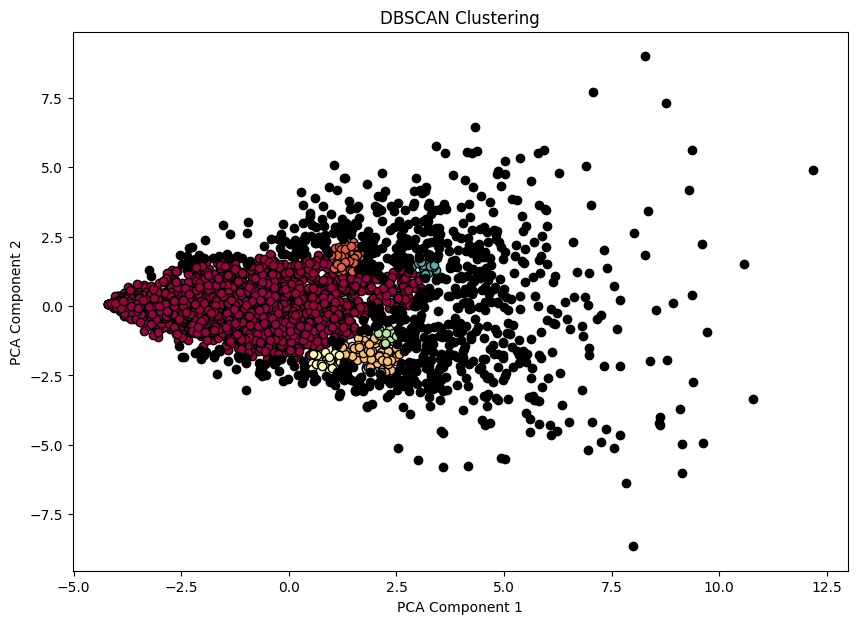

In [22]:
plt.figure(figsize=(10, 7))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)
    xy = X_pca[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X_scaled, clusters)
print('Silhouette Score:', silhouette_avg)

calinski_harabasz_avg = calinski_harabasz_score(X_scaled, clusters)
print('Calinski-Harabasz Index:', calinski_harabasz_avg)

davies_bouldin_avg = davies_bouldin_score(X_scaled, clusters)
print('Davies-Bouldin Index:', davies_bouldin_avg)

Silhouette Score: 0.06016468193581104
Calinski-Harabasz Index: 207.93781745802713
Davies-Bouldin Index: 4.103794603973471
